 **TASK-2: Supervised Machine Learning with Python and Scikit Learn**
---
**Supervised learning** is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way.

Here, we are going to see how Linear regression works. For data visualization we will be using **matplotlib** and **seaborn** library and for model we will use **LinearRegression** with the help of sklearn library.


# Stage 1: Importing dependencies

In [1]:
##Import Libraries##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Stage 2: Reading Dataset

In [2]:
##Loading Files##
url= 'http://bit.ly/w-data'
dataset = pd.read_csv(url)
dataset.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
##Get the shape of dataset##
dataset.shape

(25, 2)

In [4]:
##Dataset Information##
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Stage 3: Data Visualisation

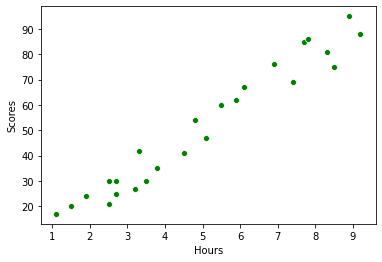

In [6]:
sns.scatterplot(x="Hours", y="Scores", data=dataset, color='green');

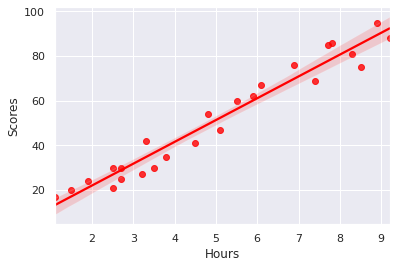

In [7]:
sns.set(color_codes=True)
sns.regplot(x="Hours", y="Scores", data=dataset, color='red');

# Stage 4: Data Preprocessing

In [8]:
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: , 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Stage 5: Building Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
score = model.score(X_train,Y_train)
print("Training RSquared score = ",score)

Training RSquared score =  0.9515510725211553


# Stage 6: Making Predictions

In [12]:
pred = model.predict(X_test)


In [13]:
result = pd.DataFrame( {'Actual': Y_test, 'Predicted': pred} )
result

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
pred_score = model.predict([[9.25]])
print("If student study for 9.25 hours then his predicted score is",pred_score[0])

If student study for 9.25 hours then his predicted score is 93.69173248737539


# Stage 7: Model Evaluation

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

score = r2_score(Y_test,pred)
mse = mean_squared_error(Y_test,pred)
mae = mean_absolute_error(Y_test,pred)

print("R2 score = ",score)
print("Mean Square Error = ", mse)
print("Mean Absolute Error = ",mae)

R2 score =  0.9454906892105354
Mean Square Error =  21.598769307217456
Mean Absolute Error =  4.183859899002982


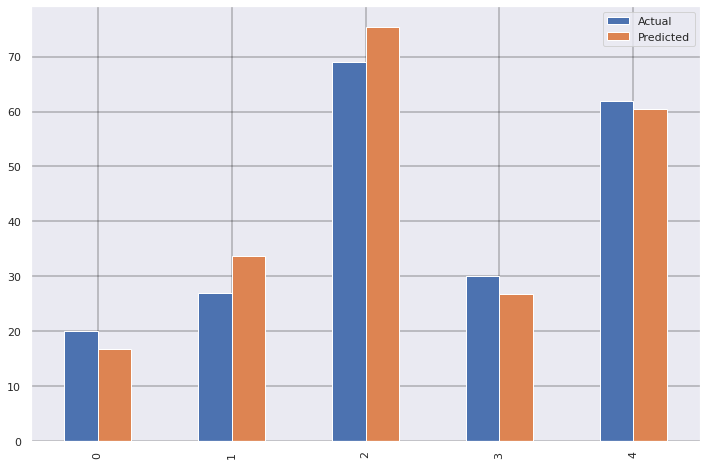

In [16]:
df = result
df.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='black')
plt.show()